# Data import for Tweets, news articles, and historical stocks
---

In [1]:
import tweepy
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
from yahoo_fin import news

from pinance import Pinance
from GoogleNews import GoogleNews
from newspaper import Article, Config
import requests as requests
import urllib as urllib
import json

import finnhub

from termcolor import colored as cl

import matplotlib.pyplot as plt
import datetime as dt
import time
import datetime as dt
import snscrape.modules.twitter as sntwitter
from searchtweets import collect_results

In [6]:
# downloading tweets for given period of time.
# use date formate the following way:
# '2022-01-30' ...'%Y-%m-%d'


#def get_tweet(stock, start_date, end_date, rows=1):

    # check if args are empty
    if stock == '' or start_date == '' or end_date == '':
        return 'Null input is invalid'
    
    # initialize empty list 
    data_list = []
    # Loops through the dates and append data to the list. 
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(stock + ' since:' + start_date + ' until:' + end_date + ' -filter:links -filter:replies').get_items()):
        if i > rows:
            break
        data_list.append([tweet.id, tweet.date, tweet.content, tweet.user.username]) 
        time.sleep(2)
    # Create DataFrame
    df = pd.DataFrame(data_list, columns=['Id', 'Datetime', 'Tweet', 'Username'])
    return df 

In [16]:
# Starting and End dates to collect tweets
start_date = '2012-07-23'
end_date = '2020-01-28'

In [9]:
# Get apple tweets from 2012-07-23 to 2020-01-28
apple_tw = get_tweet('aapl stock', start_date, end_date, rows=1)

In [10]:
# Save data file to csv
apple_tw.to_csv('datasets/aapl_20120723_20200128_tweets.csv')

### Stocks Financial News FinViz Website

In [21]:
# Get financial news for ssubset=def finance_data(stock, start_date, end_date):
def finance_data(stock, start_date, end_date):    
    finhub = 'sfdafdfafacevhr8aad3iem53cm53dfsdafads' # Example
    # Setup client
    finnhub_client = finnhub.Client(api_key=finhub)

    last_date = end_date
  
    # Company News
    # Need to use _from instead of from to avoid conflict
    i = 0
    while last_date > start_date:
        res = finnhub_client.company_news(stock, _from=start_date, to=last_date)
        print(res)
        df1 = pd.DataFrame(res)  
        print(df1.columns)
        df1.rename(columns={'datetime':'date'}, inplace=True)
        if 'date' in df1.columns:
            df1['date'] = df1['date'].apply(lambda x: dt.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))

            df1.set_index('date', inplace=True)
            df1.sort_index(inplace=True, ascending=False)

            last_date = df1.index.min()
            if i == 0:
                df = df1.copy()
                i += 1
            if i > 0:
                df = pd.concat([df, df1])
            time.sleep(2)
            df.to_csv('datasets/df_incremental_save_aapl.csv')
        else:
            date_1 = pd.to_datetime(last_date).date()
            last_date = date_1 - dt.timedelta(days=1)
            last_date = pd.to_datetime(last_date).strftime('%Y-%m-%d')
            time.sleep(2)
        print(last_date)
    df.drop_duplicates(subset=['id'], inplace=True)
    df.drop(columns=['category','image', 'related', 'url'], axis=1, inplace=True)
    
    return df

In [11]:
apple_df = finance_data('AAPL stock', start_date, end_date)

In [12]:
apple_df = pd.read_csv('datasets/aapl_news_20120723_20200128.csv')

### Historical Stock data collection:
There are two ways to collect historical stock data.
##### 1. Using Pandas's 'datareader' library. 
See below how to run the command.
##### 2. Using Yahoo finance historical data download 
- [Apple:](https://finance.yahoo.com/quote/AAPL/history?p=AAPL)
- [Google:](https://finance.yahoo.com/quote/GOOG?p=GOOG&.tsrc=fin-srch)
- [JPM:](https://finance.yahoo.com/quote/JPM/?p=JPM) 


##### Using Datereader library:

In [13]:
# Install pandas_datareader if not installed before.
#!pip install pandas_datareader this may bring issues but instead use yfinance library 
#!conda install -c conda-forge pandas-datareade

In [14]:
# Get historical stock data 
# Input args are date should follow "2020-01-01" format
# Stock Ticker can pass one 'AAPL' or more "AAPL GOOGL" 
def stock_data(symbol, start_date, end_date):
  
    # Getting the data
    stock = yf.download(symbol, start=start_date, end=end_date)

    # Display
    plt.figure(figsize=(15,6))
    stock['Adj Close'].plot(title='Opening Prices from {} to {}'.format(start_date, end_date), label=symbol, grid=True, )
    plt.show();
    
    return stock

[*********************100%***********************]  1 of 1 completed


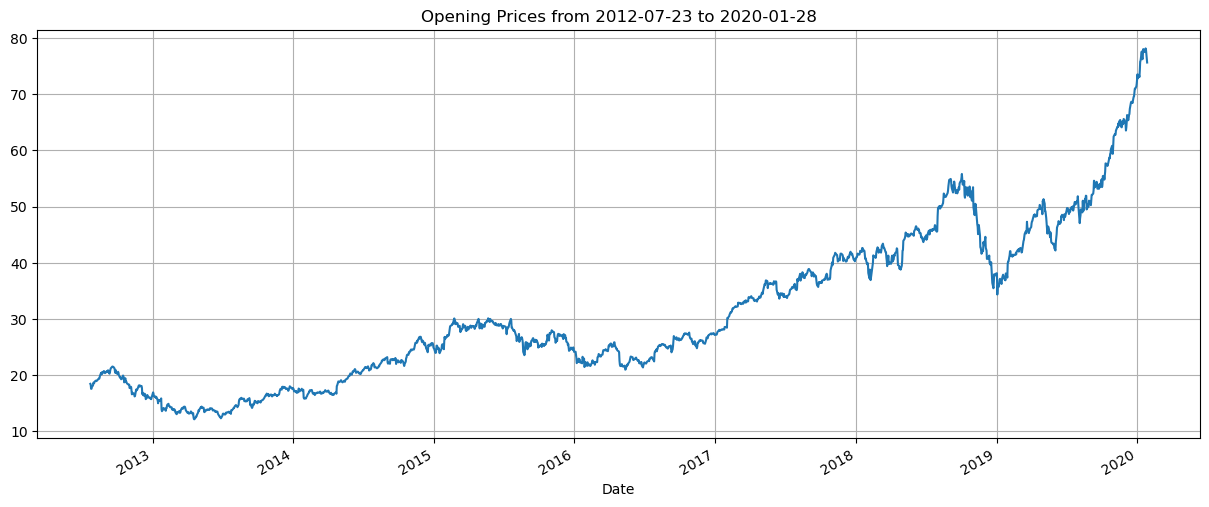

In [17]:
ticker = 'AAPL'
apple_st = stock_data(ticker, start_date, end_date)

In [18]:
apple_st.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-23,21.228571,21.639286,20.989643,21.565357,18.382696,487975600
2012-07-24,21.692142,21.774286,21.375357,21.461430,18.294107,565132400
2012-07-25,20.516430,20.742857,20.357143,20.534643,17.504091,877312800
2012-07-26,20.705713,20.728571,20.370001,20.531429,17.501362,406632800
2012-07-27,20.536072,20.922501,20.413929,20.898571,17.814320,403936400


In [19]:
apple_st.sort_index(ascending=False, inplace=True)

In [20]:
apple_st.to_csv('datasets/aapl_stock_20120723_20200128.csv')